In [2]:
import os
import csv
import numpy as np
from sklearn import model_selection
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
import pickle
import matplotlib.pyplot as plt

In [3]:
code_path = os.getcwd()
input_dir = os.path.join(code_path,'radarScenes_v6_Nmin')
print(input_dir)

/home/user/deng/catkin_deng/src/track/DBSCAN_Train/radarScenes_v6_Nmin


In [1]:
def csv_read_vel_thresh():
  print("Reading directory:",input_dir)
  files = os.listdir(input_dir)
  files.sort(key=lambda x:x[:11])
  print('Training Sequence:',len(files))
  Vel = []
  TrainX = []
  for filename in files:
    csv_path = os.path.join(input_dir,filename)
    with open(csv_path,newline='') as csv_file:
      rows = csv.reader(csv_file)
      first = True
      for row in rows:
        if first:
          first = False
          continue
        if str(row).find('nan') != -1 or str(row).find('inf') != -1:
          continue
        Vel.append(int(row[13]))
        input_row = []
        input_row.append(float(row[4])/int(row[11])) # vel slot 0
        input_row.append(float(row[5])/int(row[11])) # vel slot 1
        input_row.append(float(row[6])/int(row[11])) # vel slot 2
        input_row.append(float(row[7])/int(row[11])) # vel slot 3
        input_row.append(float(row[8])/int(row[11])) # vel slot 4
        input_row.append(float(row[9])/int(row[11])) # vel slot 5
        input_row.append(int(row[11])) # current scan num

        TrainX.append(input_row)
  VelMatrix = np.asarray(Vel)
  VelMatrix.reshape(len(Vel),1)
  print('Target:',VelMatrix[0])
  print('Input:',TrainX[0])
  TrainMatrix = np.asarray(TrainX)
  X_train, X_test, Y_train, Y_test = model_selection.train_test_split(np.array(TrainMatrix), np.array(VelMatrix), test_size=0.2)
  print('Training Element: vel slot 0~5, current scan num; Training Target: Vel threshold')
  return X_train, X_test, Y_train, Y_test, TrainMatrix, VelMatrix

In [3]:
def csv_read():
  print("Reading directory:",input_dir)
  files = os.listdir(input_dir)
  files.sort(key=lambda x:x[:11])
  print('Training Sequence:',len(files))
  Nmin = []
  TrainX = []
  for filename in files:
    csv_path = os.path.join(input_dir,filename)
    with open(csv_path,newline='') as csv_file:
      rows = csv.reader(csv_file)
      first = True
      for row in rows:
        if first:
          first = False
          continue
        if str(row).find('nan') != -1 or str(row).find('inf') != -1:
          continue
        Nmin.append(int(row[3]))  # 2:iou>=0.3, 3:iou>=0.5
        input_row = []
        input_row.append(float(row[4])/int(row[11])) # vel slot 0
        input_row.append(float(row[5])/int(row[11])) # vel slot 1
        input_row.append(float(row[6])/int(row[11])) # vel slot 2
        input_row.append(float(row[7])/int(row[11])) # vel slot 3
        input_row.append(float(row[8])/int(row[11])) # vel slot 4
        input_row.append(float(row[9])/int(row[11])) # vel slot 5
        input_row.append(int(row[11])) # current scan num

        TrainX.append(input_row)
  NminMatrix = np.asarray(Nmin)
  NminMatrix.reshape(len(Nmin),1)
  print('Target:',NminMatrix[0])
  print('Input:',TrainX[0])
  TrainMatrix = np.asarray(TrainX)
  X_train, X_test, Y_train, Y_test = model_selection.train_test_split(np.array(TrainMatrix), np.array(NminMatrix), test_size=0.2)
  print('Training Element: vel slot 0~5, current scan num; Training Target: Nmin in iou 0.5')
  return X_train, X_test, Y_train, Y_test, TrainMatrix, NminMatrix

In [4]:
X_train, X_test, Y_train, Y_test, X_total, Y_total = csv_read()

Reading directory: /home/user/deng/catkin_deng/src/track/DBSCAN_Train/radarScenes_v6_Nmin
Training Sequence: 120
Target: 2
Input: [0.984149855907781, 0.012968299711815562, 0.002881844380403458, 0.0, 0.0, 0.0, 694]
Training Element: vel slot 0~5, current scan num; Training Target: Nmin in iou 0.5


In [5]:
def save_model(model,name):
    out_path = os.path.join(code_path,name+'.sav')
    pickle.dump(model,open(out_path,'wb'))

In [6]:
def evaluate_model(model,X_test,Y_test):
    predict_y_test = model.predict(X_test)
    print('Test Score: ',model.score(X_test,Y_test))
    print(Y_test)
    print(predict_y_test)

In [7]:
def load_model(name):
    load_path = os.path.join(code_path,name+'.sav')
    return pickle.load(open(load_path, 'rb'))

In [8]:
training_model_name = 'Nmin_ClassficationMLP_model_logistic_v3'

In [9]:
print('Training Net '+training_model_name+'!')
model = MLPClassifier(hidden_layer_sizes=200, max_iter=300, activation='logistic')
model.fit(X_total,Y_total)
save_model(model, training_model_name)

Training Net Nmin_ClassficationMLP_model_logistic_v3!


{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 200, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 300, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Test Score:  0.4279926335174954
[4 3 2 ... 4 4 6]
[4 2 2 ... 2 2 2]


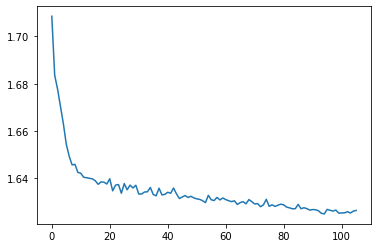

In [10]:
print(model.get_params())
evaluate_model(model,X_test,Y_test)
plt.plot(model.loss_curve_)

In [16]:
for i in range(200):
    model.partial_fit(X_train, Y_train)
    # print('End training iter',i)
    save_model(model,training_model_name)

{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 200, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 300, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Test Score:  0.42968692449355433
[4 3 2 ... 4 4 6]
[4 4 2 ... 2 2 2]
[[0.14108136 0.17677044 0.22552915 ... 0.05338907 0.03422233 0.02278543]
 [0.17521543 0.18101214 0.22273427 ... 0.04707714 0.0310052  0.02040731]
 [0.8050304  0.03710746 0.06421632 ... 0.0089484  0.00495371 0.00328641]
 ...
 [0.21540571 0.1861597  0.20912988 ... 0.04282737 0.02765165 0.01748269]
 [0.701865   0.06089264 0.10046218 ... 0.011925   0.00721195 0.00492569]
 [0.24625248 0.21259042 0.20846253 ... 0.03174436 0.02054648 0.01217577]]


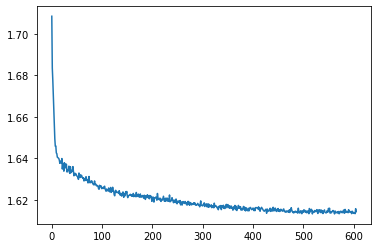

In [17]:
print(model.get_params())
evaluate_model(model,X_test,Y_test)
print(model.predict_proba(X_test))
plt.plot(model.loss_curve_)

In [13]:
model.classes_

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [18]:
intercepts = np.array(model.intercepts_)
print(intercepts.shape)
print(repr(intercepts[0]))
print(repr(intercepts[1]))

(2,)
array([-0.40723189,  1.57807708,  0.43312013,  2.11483888, -3.3997435 ,
        1.97679551,  2.38640121, -0.44821123, -0.92813005,  1.8672958 ,
        4.10972216,  2.65703229, -2.84679767,  3.34622384,  3.2600386 ,
       -2.91061294,  5.15807864,  2.48808183, -2.02743435,  3.74713574,
       -0.40343711,  0.15626515,  0.98350608,  3.82128556,  2.57545211,
        5.49061714,  2.60215603, -2.46392181, -0.95128497,  1.35487212,
        4.15113393,  3.30084234,  2.24991429,  3.51562977, -3.17659932,
        3.67272852,  3.32304249,  2.1490945 ,  3.30354418,  1.35968859,
        2.07111639,  0.56251838,  4.47814977,  1.17132548, -1.99603572,
       -1.32231545,  0.02238733,  4.36742443, -0.37242707, -1.21306235,
        5.84525442,  1.00029141,  0.58272301,  2.31979589,  8.61338463,
        3.10546544, -0.68451491, -0.2748149 ,  2.92208054, -0.37681945,
        3.25470279,  1.62577235,  2.58195288,  3.50010829,  1.77956046,
       -0.2588267 ,  0.19968776, -2.91550573,  0.36573713, 

In [19]:
coef = np.array(model.coefs_)
print(coef[0].shape)
print(coef[1].shape)
for i in range(7):
    print("coef 0-",i)
    print(repr(coef[0][i]))
reshape_coef_1 = coef[1].transpose()
for i in range(9):
    print("coef 1-",i)
    print(repr(reshape_coef_1[i]))


(7, 200)
(200, 9)
coef 0- 0
array([ 3.23093721e-05,  1.34118138e-04,  6.57132985e-05,  2.92654247e-04,
       -1.99709470e-02, -5.45690242e-02,  9.33455709e-04,  2.99891050e-05,
        2.10639215e-05,  9.76073011e-03,  8.32761256e-03,  5.66732849e-04,
       -3.03681818e-05,  1.02105572e-04,  2.81938611e-04, -5.72869144e-05,
        5.07463542e-02,  1.73739295e-02, -2.16468666e-05,  7.73222931e-03,
        5.40209321e-04,  5.15709159e-05,  7.32907442e-05,  2.05969121e-03,
        5.07875246e-04, -1.43236765e-04,  1.60914865e-02, -3.68932665e-05,
        1.13893926e-05,  2.24180524e-04,  2.23959007e-04,  3.80989520e-04,
        4.76502888e-04, -1.70004836e-05, -2.96380787e-05,  3.26488833e-03,
        1.45790392e-03,  2.34497387e-04,  3.75129571e-04,  4.05713216e-04,
       -1.11829301e-03,  7.81141885e-05,  1.19070921e-02,  4.69823731e-04,
       -2.02968391e-05, -8.61082511e-07, -2.83803549e-04, -5.44967530e-04,
        3.13715776e-05,  2.21932494e-06,  5.87711598e+00, -1.75674563e+0